<a href="https://colab.research.google.com/github/Chakilam-Gayatri/TMDB-Box-Office-Data-Analysis/blob/main/TMDB_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as s
import matplotlib.pyplot as plt
pd.set_option('max_columns', None)
%matplotlib inline
plt.style.use('ggplot')
plt.style.use('tableau-colorblind10')
import datetime
import pandas.util.testing as tm
from scipy import stats
from scipy.sparse import hstack, csr_matrix
from sklearn.model_selection import train_test_split, KFold
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams
nltk.download('stopwords')
stop = set(stopwords.words('english'))
import os
import plotly.tools as tls
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import json, ast
from urllib.request import urlopen
from PIL import Image

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  # Remove the CWD from sys.path while we load stuff.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [ ]:
import io
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
train.head(5)

,id,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,release_date,runtime,status,tagline,title,Keywords,revenue,collection_name,has_collection,num_genres,all_genres,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,num_companies,production_company_Warner Bros.,production_company_Universal Pictures,production_company_Paramount Pictures,production_company_Twentieth Century Fox Film Corporation,production_company_Columbia Pictures,production_company_Metro-Goldwyn-Mayer (MGM),production_company_New Line Cinema,production_company_Touchstone Pictures,production_company_Walt Disney Pictures,production_company_Columbia Pictures Corporation,production_company_TriStar Pictures,production_company_Relativity Media,production_company_Canal+,production_company_United Artists,production_company_Miramax Films,production_company_Village Roadshow Pictures,production_company_Regency Enterprises,production_company_BBC Films,production_company_Dune Entertainment,production_company_Working Title Films,production_company_Fox Searchlight Pictures,production_company_StudioCanal,production_company_Lionsgate,production_company_DreamWorks SKG,production_company_Fox 2000 Pictures,production_company_Summit Entertainment,production_company_Hollywood Pictures,production_company_Orion Pictures,production_company_Amblin Entertainment,production_company_Dimension Films,num_countries,production_country_United States of America,production_country_United Kingdom,production_country_France,production_country_Germany,production_country_Canada,production_country_India,production_country_Italy,production_country_Japan,production_country_Australia,production_country_Russia,production_country_Spain,production_country_China,production_country_Hong Kong,production_country_Ireland,production_country_Belgium,production_country_South Korea,production_country_Mexico,production_country_Sweden,production_country_New Zealand,production_country_Netherlands,production_country_Czech Republic,production_country_Denmark,production_country_Brazil,production_country_Luxembourg,production_country_South Africa,num_languages,language_English,language_Français,language_Español,language_Deutsch,language_Pусский,language_Italiano,language_日本語,language_普通话,language_हिन्दी,language_,language_Português,language_العربية,language_한국어/조선말,language_广州话 / 廣州話,language_தமிழ்,language_Polski,language_Magyar,language_Latin,language_svenska,language_ภาษาไทย,language_Český,language_עִבְרִית,language_ελληνικά,language_Türkçe,language_Dansk,language_Nederlands,language_فارسی,language_Tiếng Việt,language_اردو,language_Română,num_cast,cast_name_Samuel L. Jackson,cast_name_Robert De Niro,cast_name_Morgan Freeman,cast_name_J.K. Simmons,cast_name_Bruce Willis,cast_name_Liam Neeson,cast_name_Susan Sarandon,cast_name_Bruce McGill,cast_name_John Turturro,cast_name_Forest Whitaker,cast_name_Willem Dafoe,cast_name_Bill Murray,cast_name_Owen Wilson,cast_name_Nicolas Cage,cast_name_Sylvester Stallone,genders_0_cast,genders_1_cast,genders_2_cast,cast_character_,cast_character_Himself,cast_character_Herself,cast_character_Dancer,cast_character_Additional Voices (voice),cast_character_Doctor,cast_character_Reporter,cast_character_Waitress,cast_character_Nurse,cast_character_Bartender,cast_character_Jack,cast_character_Debutante,cast_character_Security Guard,cast_character_Paul,cast_character_Frank,num_crew,crew_name_Avy Kaufman,crew_name_Robert Rodriguez,crew_name_Deborah Aquila,crew_name_James Newton Howard,crew_name_Mary Vernieu,crew_name_Steven Spielberg,crew_name_Luc Besson,crew_name_Jerry Goldsmith,crew_name_Francine Maisler,crew_name_Tricia Wood,crew_name_James Horner,crew_name_Kerry Barden,crew_name_Bob Weinstein,crew_name_Harvey Weinstein,crew_name_Janet Hirshenson,genders_0_crew,genders_1_crew,genders_2_crew,jobs_

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Columns: 203 entries, id to departments_Actors
dtypes: float64(2), int64(188), object(13)
memory usage: 4.6+ MB


In [ ]:
train.columns

Index(['id', 'budget', 'homepage', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'release_date',
       ...
       'departments_Art', 'departments_Crew', 'departments_Writing',
       'departments_Costume & Make-Up', 'departments_Camera',
       'departments_Directing', 'departments_Editing',
       'departments_Visual Effects', 'departments_Lighting',
       'departments_Actors'],
      dtype='object', length=203)

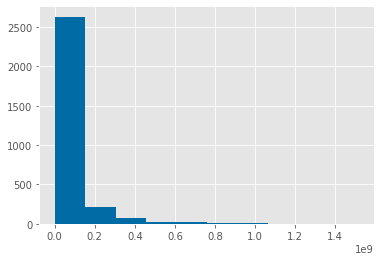

In [ ]:
train.revenue.hist()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



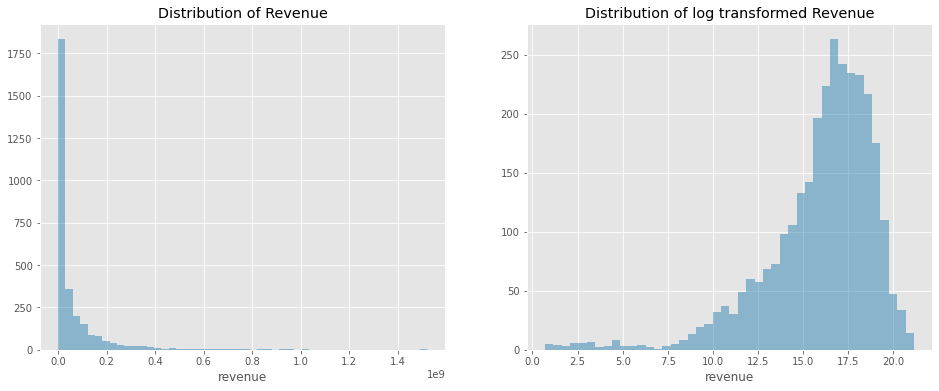

In [ ]:
fig, ax = plt.subplots(figsize=(16,6))
plt.subplot(1,2,1)
s.distplot(train['revenue'], kde= False);
plt.title('Distribution of Revenue');
plt.subplot(1,2,2)
s.distplot(np.log1p(train['revenue']), kde= False);
plt.title('Distribution of log transformed Revenue');

In [ ]:
train['log_revenue'] = np.log1p(train['revenue'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



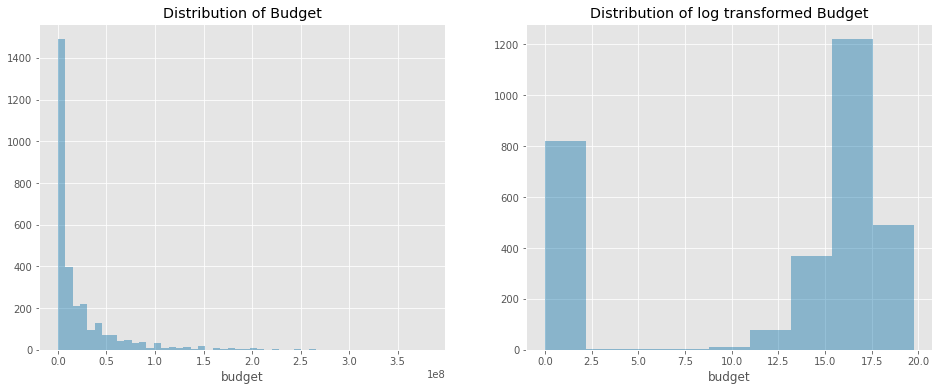

In [ ]:
fig, ax = plt.subplots(figsize=(16,6))
plt.subplot(1,2,1)
s.distplot(train['budget'], kde= False);
plt.title('Distribution of Budget');
plt.subplot(1,2,2)
s.distplot(np.log1p(train['budget']), kde= False);
plt.title('Distribution of log transformed Budget');

In [ ]:
train['log_budget'] = np.log1p(train['budget'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



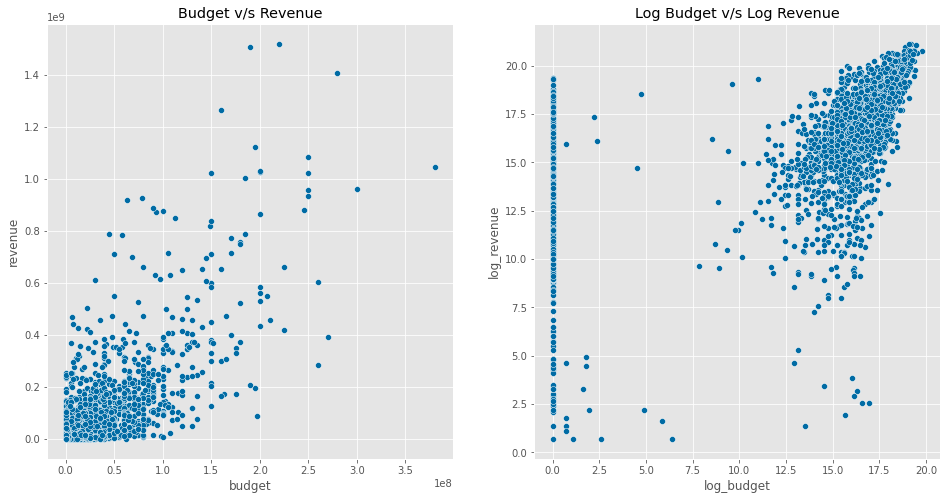

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
s.scatterplot(train['budget'], train['revenue'])
plt.title('Budget v/s Revenue');
plt.subplot(1,2,2)
s.scatterplot(train['log_budget'], train['log_revenue'])
plt.title('Log Budget v/s Log Revenue');

In [ ]:
test['log_budget'] = np.log1p(test['budget'])

In [ ]:
train['homepage'].value_counts().head(10)

http://www.transformersmovie.com/                          4
http://www.thehobbit.com/                                  2
http://www.lordoftherings.net/                             2
http://www.iloveyouman.com/                                1
http://www.uphe.com/movies/the-thing-2011                  1
http://www.universalstudiosentertainment.com/duplicity/    1
http://en.wikipedia.org/wiki/Evita_(film)                  1
http://www.riseoftaj.com/                                  1
http://www.bienvenuechezleschtis-lefilm.com/               1
http://www.sinistermovie.com/                              1
Name: homepage, dtype: int64

In [ ]:
train['has_homepage'] = 0
train.loc[train['homepage'].isnull()== False, 'has_homepage'] = 1
test['has_homepage'] = 0
test.loc[test['homepage'].isnull()== False, 'has_homepage'] = 1

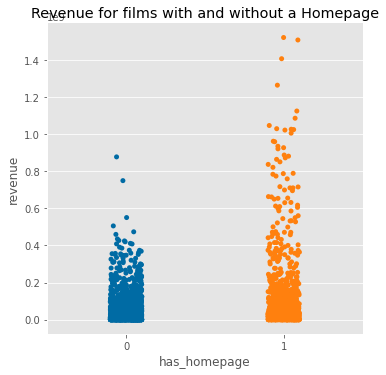

In [ ]:
s.catplot(x= 'has_homepage' , y= 'revenue' , data= train)
plt.title('Revenue for films with and without a Homepage');

In [ ]:
language_data=train.loc[train['original_language'].isin(train['original_language'].value_counts().head(10).index)]

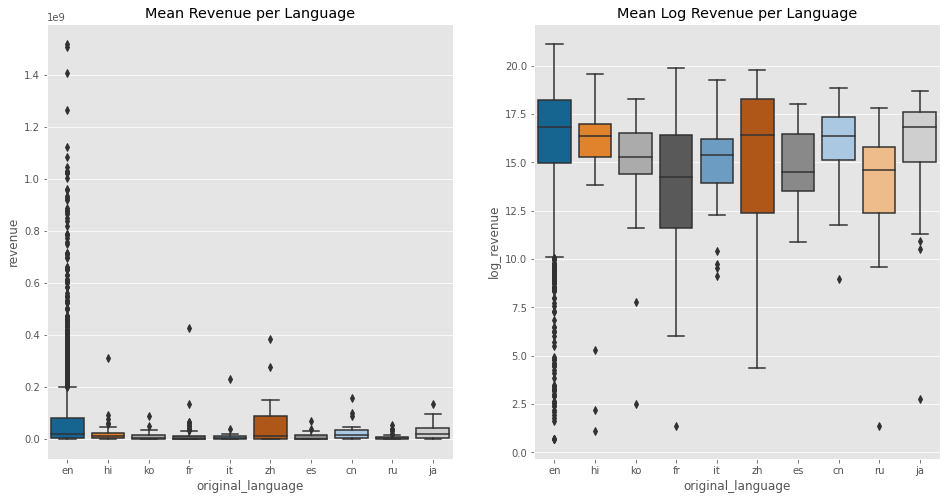

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
s.boxplot(x='original_language', y='revenue', data= language_data)
plt.title('Mean Revenue per Language');
plt.subplot(1,2,2)
s.boxplot(x='original_language', y='log_revenue', data= language_data)
plt.title('Mean Log Revenue per Language');


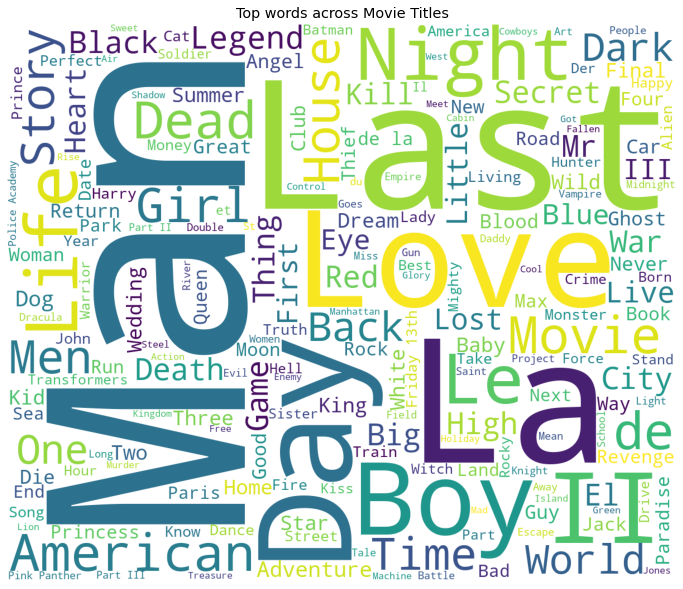

In [ ]:
plt.figure(figsize= (12,12))
text= ' '.join(train['original_title'].values)
wordcloud= WordCloud(max_font_size= None,
                     background_color= 'white',
                     width= 1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top words across Movie Titles')
plt.axis('off')
plt.show()

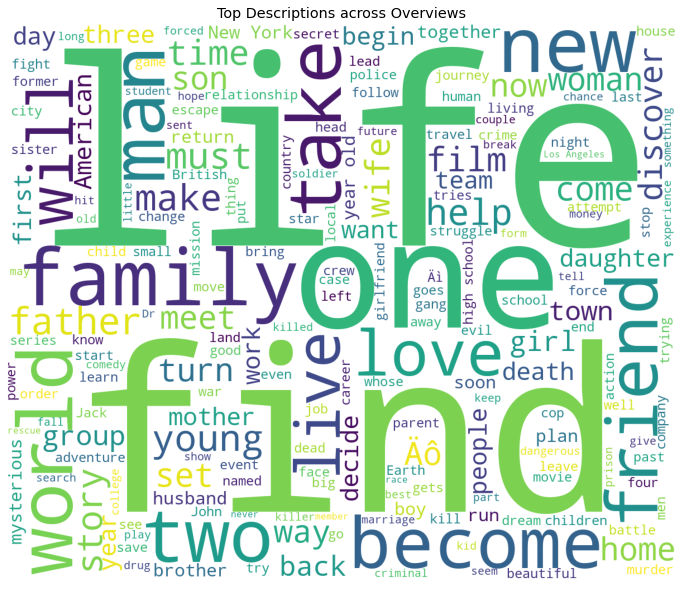

In [ ]:
plt.figure(figsize=(12,12))
text= ' '.join(train['overview'].fillna('').values)
wordcloud= WordCloud(max_font_size= None,
                     background_color='white',
                     width= 1200, height= 1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top Descriptions across Overviews')
plt.axis('off')
plt.show()

Do film descriptions impact revenue?

In [ ]:
!pip install eli5
import eli5
from sklearn.linear_model import LinearRegression

     |████████████████████████████████| 112kB 12.1MB/s 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.



In [ ]:
vectorizer = TfidfVectorizer(analyzer='word',
                             sublinear_tf= True,
                             token_pattern= r'\w{1,}',
                             ngram_range= (1,2),
                             min_df= 5
                             )
overview_text = vectorizer.fit_transform(train['overview'].fillna(''))
regressor = LinearRegression()
regressor.fit(overview_text, train['log_revenue'])
eli5.show_weights(regressor, vec= vectorizer, top=30, feature_filter= lambda x: x!= '<BIAS>')

In [ ]:
print('Target Value:', train['log_revenue'][1000])
eli5.show_prediction(regressor, doc= train['overview'].values[1000], vec=vectorizer)

Target Value: 16.44583954907521


Analyzing movie release dates

In [ ]:
test.loc[test['release_date'].isnull()== False, 'release_date'].head(10)

0     7/14/07
1     5/19/58
2     5/23/97
3      9/4/10
4     2/11/05
5      2/7/96
6    12/23/10
7     2/11/00
8      3/2/07
9    10/30/99
Name: release_date, dtype: object

In [ ]:
def fix_date(x):
  year = x.split('/')[2]
  if int(year) <= 19:
    return x[:-2] + '20' + year
  else:
    return x[:-2] + '19' + year

In [ ]:
test.loc[test['release_date'].isnull()== True].head()

,id,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,release_date,runtime,status,tagline,title,Keywords,collection_name,has_collection,num_genres,all_genres,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,num_companies,production_company_Warner Bros.,production_company_Universal Pictures,production_company_Paramount Pictures,production_company_Twentieth Century Fox Film Corporation,production_company_Columbia Pictures,production_company_Metro-Goldwyn-Mayer (MGM),production_company_New Line Cinema,production_company_Touchstone Pictures,production_company_Walt Disney Pictures,production_company_Columbia Pictures Corporation,production_company_TriStar Pictures,production_company_Relativity Media,production_company_Canal+,production_company_United Artists,production_company_Miramax Films,production_company_Village Roadshow Pictures,production_company_Regency Enterprises,production_company_BBC Films,production_company_Dune Entertainment,production_company_Working Title Films,production_company_Fox Searchlight Pictures,production_company_StudioCanal,production_company_Lionsgate,production_company_DreamWorks SKG,production_company_Fox 2000 Pictures,production_company_Summit Entertainment,production_company_Hollywood Pictures,production_company_Orion Pictures,production_company_Amblin Entertainment,production_company_Dimension Films,num_countries,production_country_United States of America,production_country_United Kingdom,production_country_France,production_country_Germany,production_country_Canada,production_country_India,production_country_Italy,production_country_Japan,production_country_Australia,production_country_Russia,production_country_Spain,production_country_China,production_country_Hong Kong,production_country_Ireland,production_country_Belgium,production_country_South Korea,production_country_Mexico,production_country_Sweden,production_country_New Zealand,production_country_Netherlands,production_country_Czech Republic,production_country_Denmark,production_country_Brazil,production_country_Luxembourg,production_country_South Africa,num_languages,language_English,language_Français,language_Español,language_Deutsch,language_Pусский,language_Italiano,language_日本語,language_普通话,language_हिन्दी,language_,language_Português,language_العربية,language_한국어/조선말,language_广州话 / 廣州話,language_தமிழ்,language_Polski,language_Magyar,language_Latin,language_svenska,language_ภาษาไทย,language_Český,language_עִבְרִית,language_ελληνικά,language_Türkçe,language_Dansk,language_Nederlands,language_فارسی,language_Tiếng Việt,language_اردو,language_Română,num_cast,cast_name_Samuel L. Jackson,cast_name_Robert De Niro,cast_name_Morgan Freeman,cast_name_J.K. Simmons,cast_name_Bruce Willis,cast_name_Liam Neeson,cast_name_Susan Sarandon,cast_name_Bruce McGill,cast_name_John Turturro,cast_name_Forest Whitaker,cast_name_Willem Dafoe,cast_name_Bill Murray,cast_name_Owen Wilson,cast_name_Nicolas Cage,cast_name_Sylvester Stallone,genders_0_cast,genders_1_cast,genders_2_cast,cast_character_,cast_character_Himself,cast_character_Herself,cast_character_Dancer,cast_character_Additional Voices (voice),cast_character_Doctor,cast_character_Reporter,cast_character_Waitress,cast_character_Nurse,cast_character_Bartender,cast_character_Jack,cast_character_Debutante,cast_character_Security Guard,cast_character_Paul,cast_character_Frank,num_crew,crew_name_Avy Kaufman,crew_name_Robert Rodriguez,crew_name_Deborah Aquila,crew_name_James Newton Howard,crew_name_Mary Vernieu,crew_name_Steven Spielberg,crew_name_Luc Besson,crew_name_Jerry Goldsmith,crew_name_Francine Maisler,crew_name_Tricia Wood,crew_name_James Horner,crew_name_Kerry Barden,crew_name_Bob Weinstein,crew_name_Harvey Weinstein,crew_name_Janet Hirshenson,genders_0_crew,genders_1_crew,genders_2_crew,jobs_Producer

In [ ]:
test.loc[test['release_date'].isnull()== True, 'release_date'] = '05/01/00'
# fixing the missing value of the release_date column

In [ ]:
train['release_date'] = train['release_date'].apply(lambda x : fix_date(x))
test['release_date'] = test['release_date'].apply(lambda x : fix_date(x))

In [ ]:
train['release_date'] = pd.to_datetime(train['release_date'])
test['release_date'] = pd.to_datetime(test['release_date'])

In [ ]:
# feature engineering the release dates
def process_date (df) :
  date_parts = ['year', 'month', 'weekday', 'weekofyear', 'day', 'quarter']
  for part in date_parts:
    part_col = 'release_date' + '_' + part
    df[part_col] = getattr(df['release_date'].dt, part).astype(int)
  return df

train = process_date(train)
test = process_date(test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



Number of Films released per year in Ascending Order

In [ ]:
import plotly

In [ ]:
d1 = train['release_date_year'].value_counts().sort_index()
d2 = test['release_date_year'].value_counts().sort_index()

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

# x values are years and y values are movie counts, name= legend
data = [go.Scatter(x=d1.index, y=d1.values, name='train'),
        go.Scatter(x=d2.index, y=d2.values, name='test')]

layout = go.Layout(dict(title="Number of films per year",
                        xaxis=dict(title='Year'),
                        yaxis=dict(title='Count'),
                       ), legend=dict(orientation='v'))
fig = go.Figure(data=data, layout=layout)
fig.show(renderer="colab")

In [ ]:
# Number of Films and Revenue generated

d1 = train['release_date_year'].value_counts().sort_index()
d2 = train.groupby(['release_date_year'])['revenue'].sum()

data = [go.Scatter(x=d1.index, y=d1.values, name='film count'),
        go.Scatter(x=d2.index, y=d2.values, name='total revenue', yaxis='y2')]

layout = go.Layout(dict(title = "Number of films and total revenue per year",
                        xaxis = dict(title = 'Year'),
                        yaxis = dict(title = 'Count'),
                        yaxis2 = dict(title='Total revenue', overlaying='y', side='right')),
                   legend=dict(orientation="v"))

fig = go.Figure(data=data, layout=layout)
fig.show(renderer = "colab")

In [ ]:
# Number of Films and Revenue generated

d1 = train['release_date_year'].value_counts().sort_index()
d2 = train.groupby(['release_date_year'])['revenue'].sum()

data = [go.Scatter(x=d1.index, y=d1.values, name='film count'),
        go.Scatter(x=d2.index, y=d2.values, name='total revenue', yaxis='y2')]

layout = go.Layout(dict(title = "Number of films and total revenue per year",
                        xaxis = dict(title = 'Year'),
                        yaxis = dict(title = 'Count'),
                        yaxis2 = dict(title='Total revenue', overlaying='y', side='right')),
                   legend=dict(orientation="v"))

fig = go.Figure(data=data, layout=layout)
fig.show(renderer = "colab")

Do Release Days Impact Revenue of the Films ?

Text(0.5, 1.0, 'Revenue of different days of the week')

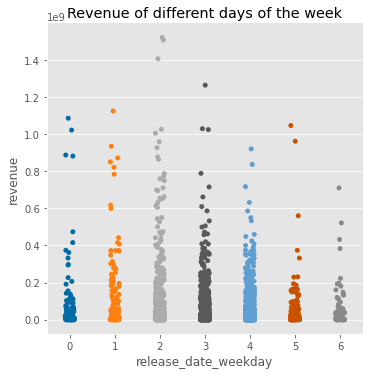

In [ ]:
s.catplot(x='release_date_weekday', y='revenue', data=train);
plt.title('Revenue of different days of the week')

Relationship between Runtime & Revenue

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Distribution of length of films in hours')

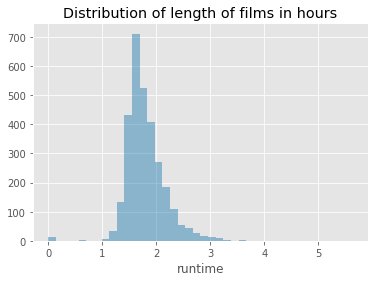

In [ ]:
s.distplot(train['runtime'].fillna(0)/60, bins=40, kde= False)
plt.title('Distribution of length of films in hours')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Runtime v/s Revenue')

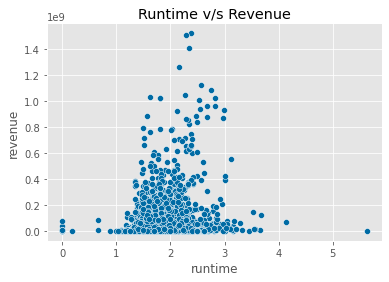

In [ ]:
s.scatterplot(train['runtime'].fillna(0)/60, train['revenue'])
plt.title('Runtime v/s Revenue')